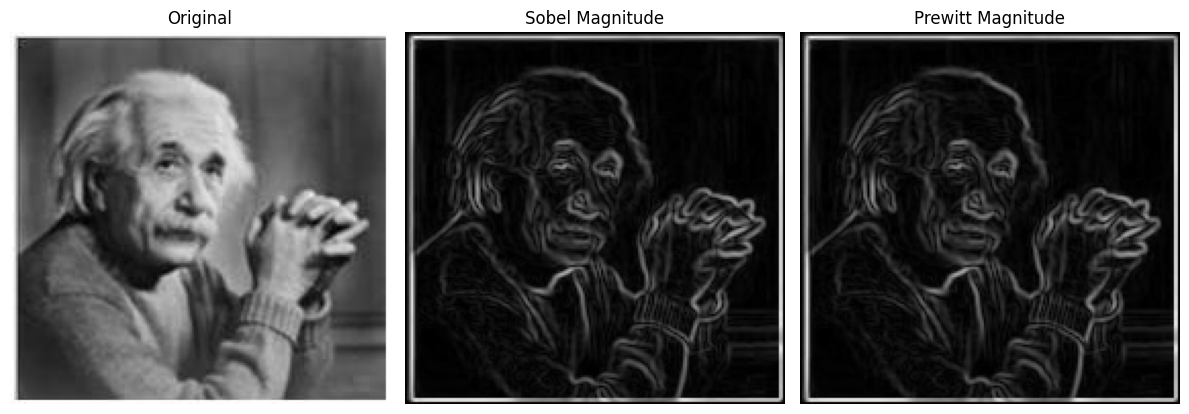

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to the input image
image_path = './Q4/eins.png'

# 1. Load the image in grayscale
if not os.path.exists(image_path):
    print(f"Error: {image_path} is not found.")
else:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 2. Define Sobel and Prewitt kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

    # Prewitt kernels (with equal weights in all entries)
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

    # 3. Extract horizontal and vertical components using filter2D
    # Use CV_64F for higher precision and to prevent overflow
    s_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    s_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)
    
    p_x = cv2.filter2D(image, cv2.CV_64F, prewitt_x)
    p_y = cv2.filter2D(image, cv2.CV_64F, prewitt_y)

    # 4. Calculate the final gradient magnitude
    # Magnitude = sqrt(Gx^2 + Gy^2)
    sobel_mag = np.sqrt(s_x**2 + s_y**2)
    prewitt_mag = np.sqrt(p_x**2 + p_y**2)

    # 5. Display and compare results
    plt.figure(figsize=(12, 8))
    titles = ['Original', 'Sobel Magnitude', 'Prewitt Magnitude']
    imgs = [image, sobel_mag, prewitt_mag]

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(imgs[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()